In [1]:
#from dask.distributed import LocalCluster
import geopandas as gpd
import rioxarray as rxr
import xvec
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from exactextract import exact_extract
#from osgeo import ogr, gdal
import statsmodels.api as sm
from matplotlib.cm import ScalarMappable

#gdal.UseExceptions()
#ogr.UseExceptions()

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

# Data

In [2]:
fishnet = gpd.read_file(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\canadaFishnet_60km_sub10km_HBLclip.shp")
fishnet

,ID,ID_sub,geometry
0,365,16,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,365,17,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,365,22,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,365,23,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,365,28,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...
4316,1544,8,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,1544,9,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,1544,10,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,1544,11,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [3]:
ims_m = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\interannual\IMS_snow_start_mn_1823_HBL.tif", masked = True)
ims_m

<xarray.DataArray (band: 1, y: 933, x: 1318)> Size: 5MB
[1229694 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 11kB -4.551e+04 -4.451e+04 ... 1.27e+06 1.271e+06
  * y            (y) float64 7kB 1.109e+06 1.108e+06 ... 1.781e+05 1.771e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    long_name:               snow_start_mn
    STATISTICS_COUNT:        393876.0
    STATISTICS_COVARIANCES:  56.51631862908951
    STATISTICS_MAXIMUM:      13.800000190735
    STATISTICS_MEAN:         -60.484148378152
    STATISTICS_MEDIAN:       -61.249414
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       7.517733609878
    AREA_OR_POINT:           Area
    scale_factor:            1.0
    add_offset:              0.0

In [4]:
ims_2223 = rxr.open_rasterio(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\AA\Regional Snow Dynamics\IMS\winterYear\2022-2023\IMS_snow_start_winterYear2223_HBL.tif", masked = True)
ims_2223

<xarray.DataArray (band: 1, y: 933, x: 1318)> Size: 5MB
[1229694 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 11kB -4.551e+04 -4.451e+04 ... 1.27e+06 1.271e+06
  * y            (y) float64 7kB 1.109e+06 1.108e+06 ... 1.781e+05 1.771e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    long_name:               snow_start
    STATISTICS_COUNT:        393876.0
    STATISTICS_COVARIANCES:  77.02995851073965
    STATISTICS_MAXIMUM:      -2
    STATISTICS_MEAN:         -55.638744173294
    STATISTICS_MEDIAN:       -57.25098
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       8.7766712659607
    AREA_OR_POINT:           Area
    scale_factor:            1.0
    add_offset:              0.0

In [5]:
hls_wm = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\start\weighted_mean\HLS_Fmask_snow_start_mn_1823_HBL.tif", masked = True)
hls_wm

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  110.2164876380824
    STATISTICS_MAXIMUM:      134.17974853516
    STATISTICS_MEAN:         -59.514650851364
    STATISTICS_MEDIAN:       -60.934956
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.498404051954
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start_mn

In [6]:
hls_q = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\interannual\start\weighted_mean\HLS_Fmask_snow_start_q_mn_1823_HBL.tif", masked = True)
hls_q

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437628181.0
    STATISTICS_COVARIANCES:  0.004443418559171003
    STATISTICS_MAXIMUM:      0.95019119977951
    STATISTICS_MEAN:         0.70038918572736
    STATISTICS_MEDIAN:       0.705859
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.066658972083066
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start_q_mn

In [7]:
hls_2223 = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\start\HLS_Fmask_snow_start_winterYear2223_HBL.tif", masked = True)
hls_2223

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  245.2100402477944
    STATISTICS_MAXIMUM:      128
    STATISTICS_MEAN:         -51.129868531736
    STATISTICS_MEDIAN:       -53.066667
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       15.659183894692
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start

In [8]:
hls_u = rxr.open_rasterio(r"F:\HLS\HBL\Products\SnowDynamics\winterYear\2223\start\HLS_Fmask_snow_start_u_winterYear2223_HBL.tif", masked = True)
hls_u

<xarray.DataArray (band: 1, y: 32000, x: 46000)> Size: 6GB
[1472000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 368kB -7.102e+04 -7.1e+04 ... 1.309e+06 1.309e+06
  * y            (y) float64 256kB 1.135e+06 1.135e+06 ... 1.753e+05 1.753e+05
    spatial_ref  int64 8B 0
Attributes: (12/13)
    AREA_OR_POINT:           Area
    STATISTICS_COUNT:        437626315.0
    STATISTICS_COVARIANCES:  115.3391320133089
    STATISTICS_MAXIMUM:      83
    STATISTICS_MEAN:         13.73002256388
    STATISTICS_MEDIAN:       11.392157
    ...                      ...
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       10.739605766196
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               snow_start_u

# For each square, get mean value and pixel count

In [9]:
ims_m_stats = exact_extract(ims_m, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
ims_m_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [00:37<00:00,  2.65it/s]


,mean,count,geometry
0,-63.200001,10.484036,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,-63.131809,49.031225,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,-63.200001,17.743717,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,-63.015460,99.989182,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,NaN,0.000000,"POLYGON ((638714.128 215276.489, 638972.823 21..."
...,...,...,...
4316,-46.731655,2.971585,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4317,-46.712309,2.001660,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4318,-44.356743,3.823005,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4319,-43.173581,0.795929,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [10]:
ims_m_stats[ims_m_stats['count'] == 0]

,mean,count,geometry
4,NaN,0.0,"POLYGON ((638714.128 215276.489, 638972.823 21..."
6,NaN,0.0,"POLYGON ((638972.823 227294.085, 638568.82 228..."
750,NaN,0.0,"POLYGON ((578972.823 378674.75, 578906.193 378..."
1479,NaN,0.0,"POLYGON ((528972.823 494314.01, 528945.753 494..."
1741,NaN,0.0,"POLYGON ((1008972.823 510834.776, 1008917.759 ..."
1743,NaN,0.0,"POLYGON ((1008717.834 515276.489, 1008718.194 ..."
2192,NaN,0.0,"POLYGON ((958972.823 593303.15, 958911.271 593..."
2617,NaN,0.0,"POLYGON ((958915.244 595276.489, 958972.823 59..."
2637,NaN,0.0,"POLYGON ((1008972.823 645130.04, 1008894.544 6..."
3759,NaN,0.0,"POLYGON ((38876.518 865276.489, 38895.881 8653..."


In [11]:
# Some IMS squares have 0, so lets filter fishnet and ims_stats
fishnet = fishnet[ims_m_stats['count'] > 0].reset_index()
ims_m_stats = ims_m_stats[ims_m_stats['count'] > 0].reset_index()
len(ims_m_stats)

4311

In [12]:
ims_2223_stats = exact_extract(ims_2223, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
ims_2223_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [00:37<00:00,  2.67it/s]


,mean,count,geometry
0,-54.000000,10.484036,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,-54.000000,49.031225,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,-54.000000,17.743717,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,-54.000000,99.989182,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,-54.000000,91.463957,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...,...
4306,-46.168652,2.971585,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,-48.922147,2.001660,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,-43.862239,3.823005,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,-43.000000,0.795929,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [13]:
hls_wm_stats = exact_extract(hls_wm, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
hls_wm_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:36<00:00,  1.04it/s]


,mean,count,geometry
0,-53.374712,12444.104406,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,-52.263120,55495.216324,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,-53.888544,21045.095058,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,-53.512962,111111.111108,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,-57.944348,102482.345897,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...,...
4306,-29.598725,4130.349849,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,-31.005720,3096.946954,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,-19.767997,5079.943104,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,-20.250309,1445.464026,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [14]:
hls_wm_stats[hls_wm_stats['count'] == 0]

,mean,count,geometry


In [15]:
hls_q_stats = exact_extract(hls_q, fishnet, ['mean'], include_geom = True, output = 'pandas', progress = True)
hls_q_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:41<00:00,  1.01s/it]


,mean,geometry
0,0.671663,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,0.683836,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,0.681761,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,0.681135,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,0.662410,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...
4306,0.530937,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,0.520768,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,0.493383,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,0.498144,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [16]:
hls_2223_stats = exact_extract(hls_2223, fishnet, ['mean', 'count'], include_geom = True, output = 'pandas', progress = True)
hls_2223_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:39<00:00,  1.00it/s]


,mean,count,geometry
0,-41.429567,12444.104406,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,-41.811655,55495.216324,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,-41.464409,21045.095058,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,-41.645690,111111.111108,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,-40.909464,102482.345897,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...,...
4306,-10.355635,4130.349849,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,-13.336611,3096.946954,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,-26.998228,5079.943104,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,-27.000000,1445.464026,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


In [17]:
hls_u_stats = exact_extract(hls_u, fishnet, ['mean'], include_geom = True, output = 'pandas', progress = True)
hls_u_stats

C:\Users\mbonney\Miniforge3\envs\snow_hls_2025\Lib\site-packages\exactextract\exact_extract.py:330: RuntimeWarning: Spatial reference system of input features does not exactly match raster.
  warnings.warn(
.: 100%|███████████████████████████████████████████████████████████████████████████| 100.0/100 [01:40<00:00,  1.00s/it]


,mean,geometry
0,17.618159,"POLYGON ((638171.882 201462.446, 636878.257 20..."
1,17.196472,"POLYGON ((648972.823 196065.864, 648630.883 19..."
2,16.833280,"POLYGON ((635722.827 205276.489, 635792.132 20..."
3,16.765454,"POLYGON ((638972.823 205276.489, 638972.823 21..."
4,18.367625,"POLYGON ((638972.823 215276.489, 638972.823 21..."
...,...,...
4306,46.187546,"MULTIPOLYGON (((68972.823 1085276.489, 68972.8..."
4307,49.347971,"POLYGON ((78972.823 1085276.489, 78972.823 108..."
4308,62.009328,"POLYGON ((92842.641 1085276.489, 93214.728 108..."
4309,62.023176,"POLYGON ((98972.823 1085276.489, 98972.823 108..."


# Plot

C:\Users\mbonney\AppData\Local\Temp\ipykernel_14180\2235518584.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad = 0, w_pad = 1)


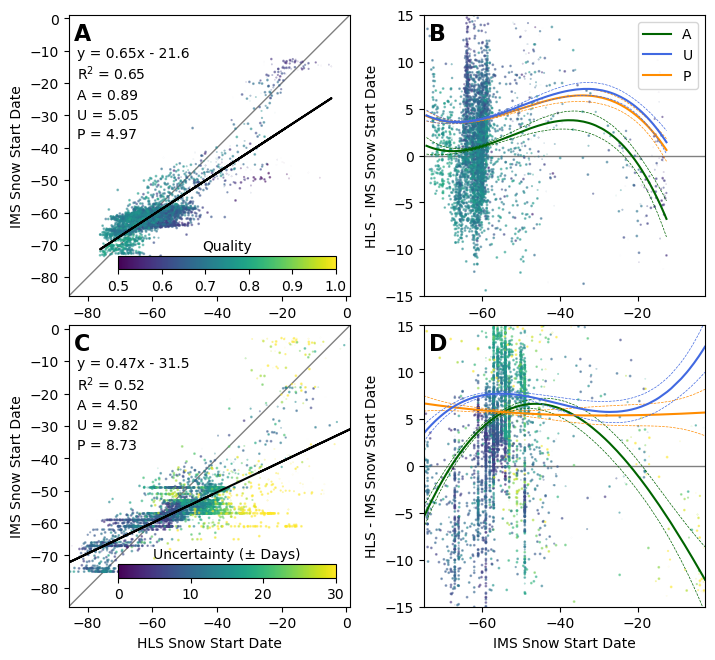

In [18]:
fig, axs = plt.subplots(2, 2, figsize = (7.25, 7.25 * 0.925))

# Define min/max ranges for A and C
obsPred_pmin = min([hls_wm_stats['mean'].min(), ims_m_stats['mean'].min(), hls_2223_stats['mean'].min(), ims_2223_stats['mean'].min()])
obsPred_pmax = max([hls_wm_stats['mean'].max(), ims_m_stats['mean'].max(), hls_2223_stats['mean'].max(), ims_2223_stats['mean'].max()])

# Define min/max ranges for B and D
apu_pmin = min([ims_m_stats['mean'].min(), ims_2223_stats['mean'].min()])
apu_pmax = max([ims_m_stats['mean'].max(), ims_2223_stats['mean'].max()])

q_range = [0.5, 1] # Quality range for A and B
weights_m = (hls_wm_stats['count'] / hls_wm_stats['count'].max()) * (ims_m_stats['count'] / ims_m_stats['count'].max()) # Weights for A and B

u_range = [0, 30] # Quality range for C and D
weights_2223 = (hls_2223_stats['count'] / hls_2223_stats['count'].max()) * (ims_2223_stats['count'] / ims_2223_stats['count'].max()) # Weights for C and D

n = len(hls_wm_stats['mean']) # Same for all
w_size = 1
alpha = 0.5

# A, top left (Interannual Obs v Pred Plot)
ann_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.02), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.91))
axs[0, 0].text(ann_spot[0], ann_spot[1], 'A', fontsize = 16, weight = 'bold')

pred = hls_wm_stats['mean']
obs = ims_m_stats['mean']
qual = hls_q_stats['mean']
res = pred - obs # Residuals (predicted - observed)

lm = LinearRegression()
lm.fit(pred.to_frame(), obs.to_frame(), sample_weight = weights_m) # Fit linear model
obs_pred = lm.predict(pred.to_frame()) # Predict obs using pred

r2 = r2_score(obs, obs_pred, sample_weight = weights_m)
acc = np.average(res, weights = weights_m)
unc = np.average(res ** 2, weights = weights_m) ** (0.5)
pre = np.average((res - acc) ** 2, weights = weights_m) ** 0.5

axs[0,0].axline((obsPred_pmin, obsPred_pmin), (obsPred_pmax, obsPred_pmax), color = "gray", lw = 1, zorder = 0) # 1-1 line

scatter = axs[0,0].scatter(x = pred, y = obs, s = weights_m * w_size, c = qual, vmin = q_range[0], vmax = q_range[1], alpha = alpha)

axs[0,0].plot(pred, obs_pred, color = 'k', lw = 1.5) # Plot regression line

equ_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.85))
if lm.intercept_[0] < 0: 
    axs[0,0].annotate('y ={0: .2f}x -{1: .1f}'.format(lm.coef_[0][0], abs(lm.intercept_[0])), xy = equ_spot)
if lm.intercept_[0] >= 0:
    axs[0,0].annotate('y ={0: .2f}x +{1: .1f}'.format(lm.coef_[0][0], lm.intercept_[0]), xy = equ_spot)

r2_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.77))
axs[0,0].annotate(f'R$^2$ = {r2:.2f}', xy = r2_spot)

acc_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.70))
axs[0,0].annotate(f'A = {acc:.2f}', xy = acc_spot)

unc_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.63))
axs[0,0].annotate(f'U = {unc:.2f}', xy = unc_spot)

pre_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.56))
axs[0,0].annotate(f'P = {pre:.2f}', xy = pre_spot)

axs[0,0].set_xlim(obsPred_pmin, obsPred_pmax)
#axs[0,0].set_xlabel('Predicted Snow Start Date (HLS)')

axs[0,0].set_ylim(obsPred_pmin, obsPred_pmax)
axs[0,0].set_ylabel('IMS Snow Start Date')

cbax = fig.add_axes([0.17, 0.59, 0.3, 0.02]) # Left, Bottom, Width, Height
cb = plt.colorbar(ScalarMappable(cmap = scatter.get_cmap(), norm = scatter.norm), cax = cbax, orientation = 'horizontal', label = 'Quality')
cb.ax.xaxis.set_label_position('top')

# B, top right (Interannual APU curve)
ann_spot = (apu_pmin + ((apu_pmax - apu_pmin) * 0.02), -15 + ((15 - -15) * 0.91)) # 0.92
axs[0,1].text(ann_spot[0], ann_spot[1], 'B', fontsize = 16, weight = 'bold')

axs[0,1].axline((obs.min(), 0), (obs.max(), 0), color = "gray", lw = 1, zorder = 0) # 0 line

scatter = axs[0,1].scatter(x = obs, y = res, s = weights_m * w_size, c = qual, vmin = q_range[0], vmax = q_range[1], alpha = alpha)

poly = PolynomialFeatures(degree = 3)
xp = poly.fit_transform(np.array(obs).reshape(-1,1))
accSummary = sm.WLS(endog = res, exog = xp, weights = weights_m).fit().get_prediction(xp).summary_frame(alpha = 0.05)
pre = abs(res - np.array(accSummary['mean']))
unc = abs(res)
preSummary = sm.WLS(endog = pre, exog = xp, weights = weights_m).fit().get_prediction(xp).summary_frame(alpha = 0.05)
uncSummary = sm.WLS(endog = unc, exog = xp, weights = weights_m).fit().get_prediction(xp).summary_frame(alpha = 0.05)

order = np.argsort(obs) # For clean curves
axs[0,1].plot(obs[order], accSummary['mean'][order], color = 'darkgreen', label = 'A')
axs[0,1].plot(obs[order], accSummary['mean_ci_upper'][order], color = 'darkgreen',linewidth = 0.5, linestyle = '--')
axs[0,1].plot(obs[order], accSummary['mean_ci_lower'][order], color = 'darkgreen', linewidth = 0.5, linestyle = '--')
axs[0,1].plot(obs[order], preSummary['mean'][order], color = 'darkorange', label = 'P')
axs[0,1].plot(obs[order], preSummary['mean_ci_upper'][order], color = 'darkorange', linewidth = 0.5, linestyle = '--')
axs[0,1].plot(obs[order], preSummary['mean_ci_lower'][order],color = 'darkorange', linewidth = 0.5, linestyle = '--')
axs[0,1].plot(obs[order], uncSummary['mean'][order], color = 'royalblue', label = 'U')
axs[0,1].plot(obs[order], uncSummary['mean_ci_upper'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')
axs[0,1].plot(obs[order], uncSummary['mean_ci_lower'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')

axs[0,1].set_xlim(apu_pmin, apu_pmax)
#axs[0,1].set_xlabel('Observed Snow Start Date')

axs[0,1].set_ylim(-15, 15)
axs[0,1].set_ylabel('HLS - IMS Snow Start Date')

handles, labels = axs[0,1].get_legend_handles_labels()
order = [0, 2, 1]
axs[0,1].legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc = 'upper right')

# C, bottom left (Winter year Obs v Pred Plot)
ann_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.02), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.91))
axs[1,0].text(ann_spot[0], ann_spot[1], 'C', fontsize = 16, weight = 'bold')

pred = hls_2223_stats['mean']
obs = ims_2223_stats['mean']
qual = hls_u_stats['mean']
res = pred - obs # Residuals (predicted - observed)

lm = LinearRegression()
lm.fit(pred.to_frame(), obs.to_frame(), sample_weight = weights_2223) # Fit linear model
obs_pred = lm.predict(pred.to_frame()) # Predict obs using pred

r2 = r2_score(obs, obs_pred, sample_weight = weights_2223)
acc = np.average(res, weights = weights_2223)
unc = np.average(res ** 2, weights = weights_2223) ** (0.5)
pre = np.average((res - acc) ** 2, weights = weights_2223) ** 0.5

axs[1,0].axline((obsPred_pmin, obsPred_pmin), (obsPred_pmax, obsPred_pmax), color = "gray", lw = 1, zorder = 0) # 1-1 line

scatter = axs[1,0].scatter(x = pred, y = obs, s = weights_2223 * w_size, c = qual, vmin = u_range[0], vmax = u_range[1], alpha = alpha)

axs[1,0].plot(pred, obs_pred, color = 'k', lw = 1.5) # Plot regression line

equ_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.85))
if lm.intercept_[0] < 0: 
    axs[1,0].annotate('y ={0: .2f}x -{1: .1f}'.format(lm.coef_[0][0], abs(lm.intercept_[0])), xy = equ_spot)
if lm.intercept_[0] >= 0:
    axs[1,0].annotate('y ={0: .2f}x +{1: .1f}'.format(lm.coef_[0][0], lm.intercept_[0]), xy = equ_spot)

r2_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.77))
axs[1,0].annotate(f'R$^2$ = {r2:.2f}', xy = r2_spot)

acc_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.70))
axs[1,0].annotate(f'A = {acc:.2f}', xy = acc_spot)

unc_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.63))
axs[1,0].annotate(f'U = {unc:.2f}', xy = unc_spot)

pre_spot = (obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.03), obsPred_pmin + ((obsPred_pmax - obsPred_pmin) * 0.56))
axs[1,0].annotate(f'P = {pre:.2f}', xy = pre_spot)

axs[1,0].set_xlim(obsPred_pmin, obsPred_pmax)
axs[1,0].set_xlabel('HLS Snow Start Date')

axs[1,0].set_ylim(obsPred_pmin, obsPred_pmax)
axs[1,0].set_ylabel('IMS Snow Start Date')

cbax = fig.add_axes([0.17, 0.13, 0.3, 0.02]) # Left, Bottom, Width, Height
cb = plt.colorbar(ScalarMappable(cmap = scatter.get_cmap(), norm = scatter.norm), cax = cbax, orientation = 'horizontal', label = 'Uncertainty (± Days)')
cb.ax.xaxis.set_label_position('top')

axs[1,0].set_xlim(obsPred_pmin, obsPred_pmax)
axs[1,0].set_xlabel('HLS Snow Start Date')

axs[1,0].set_ylim(obsPred_pmin, obsPred_pmax)
axs[1,0].set_ylabel('IMS Snow Start Date')

# D, bottom right (Winter year APU curve)
ann_spot = (apu_pmin + ((apu_pmax - apu_pmin) * 0.02), -15 + ((15 - -15) * 0.91)) # 0.92
axs[1,1].text(ann_spot[0], ann_spot[1], 'D', fontsize = 16, weight = 'bold')

axs[1,1].axline((obs.min(), 0), (obs.max(), 0), color = "gray", lw = 1, zorder = 0) # 0 line

scatter = axs[1,1].scatter(x = obs, y = res, s = weights_2223 * w_size, c = qual, vmin = u_range[0], vmax = u_range[1], alpha = alpha)

poly = PolynomialFeatures(degree = 3)
xp = poly.fit_transform(np.array(obs).reshape(-1,1))
accSummary = sm.WLS(endog = res, exog = xp, weights = weights_2223).fit().get_prediction(xp).summary_frame(alpha = 0.05)
pre = abs(res - np.array(accSummary['mean']))
unc = abs(res)
preSummary = sm.WLS(endog = pre, exog = xp, weights = weights_2223).fit().get_prediction(xp).summary_frame(alpha = 0.05)
uncSummary = sm.WLS(endog = unc, exog = xp, weights = weights_2223).fit().get_prediction(xp).summary_frame(alpha = 0.05)

order = np.argsort(obs) # For clean curves
axs[1,1].plot(obs[order], accSummary['mean'][order], color = 'darkgreen', label = 'A')
axs[1,1].plot(obs[order], accSummary['mean_ci_upper'][order], color = 'darkgreen',linewidth = 0.5, linestyle = '--')
axs[1,1].plot(obs[order], accSummary['mean_ci_lower'][order], color = 'darkgreen', linewidth = 0.5, linestyle = '--')
axs[1,1].plot(obs[order], preSummary['mean'][order], color = 'darkorange', label = 'P')
axs[1,1].plot(obs[order], preSummary['mean_ci_upper'][order], color = 'darkorange', linewidth = 0.5, linestyle = '--')
axs[1,1].plot(obs[order], preSummary['mean_ci_lower'][order],color = 'darkorange', linewidth = 0.5, linestyle = '--')
axs[1,1].plot(obs[order], uncSummary['mean'][order], color = 'royalblue', label = 'U')
axs[1,1].plot(obs[order], uncSummary['mean_ci_upper'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')
axs[1,1].plot(obs[order], uncSummary['mean_ci_lower'][order], color = 'royalblue', linewidth = 0.5, linestyle = '--')

axs[1,1].set_xlim(apu_pmin, apu_pmax)
axs[1,1].set_xlabel('IMS Snow Start Date')

axs[1,1].set_ylim(-15, 15)
axs[1,1].set_ylabel('HLS - IMS Snow Start Date')

plt.tight_layout(h_pad = 0, w_pad = 1)

fig.get_figure().savefig('Figure S26.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})

In [20]:
#r2_score(ims_2223_stats['mean'], hls_2223_stats['mean'], sample_weight = weights_2223)

In [21]:
#r2_score(ims_2223_stats['mean'], hls_2223_stats['mean'])

In [22]:
# y = ims_2223_stats['mean'] 
# x = hls_2223_stats['mean']
# 1 - (((y - x) ** 2).sum() / ((y - y.mean()) ** 2).sum())

In [23]:
# import scipy
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
# # print(slope)
# # print(intercept)
# print(r_value**2)
# # print(p_value)
# # print(std_err)

In [24]:
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hls_wm_stats['mean'], ims_m_stats['mean'])
# r_value

In [25]:
# fishnet = fishnet.drop(['index'], axis = 1)
# fishnet['res_m'] = hls_wm_stats['mean'] - ims_m_stats['mean']
# fishnet['qual'] = hls_q_stats['mean']
# fishnet['res_2223'] = hls_2223_stats['mean'] - ims_2223_stats['mean']
# fishnet['unc'] = hls_u_stats['mean']
# fishnet

In [26]:
# fishnet.to_file('fishnet_10km_start.shp')